In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
import matplotlib.pyplot as plt
from torch.utils.data import Subset
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, f1_score, matthews_corrcoef,recall_score,precision_score

In [2]:
def metrics_output(preds,labels):
    true_labels = np.array(labels)
    predicted_probs = np.array(preds)
    binary_predictions = (predicted_probs >= 0.5).astype(int)
    auc = roc_auc_score(true_labels, predicted_probs)
    conf_matrix = confusion_matrix(true_labels, binary_predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(true_labels, binary_predictions)
    f1 = f1_score(true_labels, binary_predictions)
    mcc = matthews_corrcoef(true_labels, binary_predictions)  
    return (auc, sensitivity, specificity, accuracy, f1, mcc)

In [10]:
file_path = 'D:/Jupyter_directory/F5C-codes/Ensemble/ROC_emsemble/'
ResNet_predicted_probabilities = np.load(file_path + 'ResNet_predicted_probabilities.npy')  
Xgboost_predicted_probabilities = np.load(file_path + 'Xgboost_predicted_probabilities.npy')  
LR_predicted_probabilities = np.load(file_path + 'LR_predicted_probabilities.npy')  
LSTM_predicted_probabilities = np.load(file_path + 'LSTM_predicted_probabilities.npy')
CNN_predicted_probabilities = np.load(file_path + 'CNN_predicted_probabilities.npy')  
true_labels = np.load(file_path + 'true_labels.npy') 

CNN + LSTM + LR + XGB + Resf5C

In [11]:
predicted_probabilities = (np.array(ResNet_predicted_probabilities).reshape(-1) + 
                           np.array(Xgboost_predicted_probabilities)+
                           np.array(LR_predicted_probabilities)+
                           np.array(LSTM_predicted_probabilities).reshape(-1) + 
                           np.array(CNN_predicted_probabilities).reshape(-1)
                           )/5
y_label = np.array(true_labels)
y_hat = np.array(predicted_probabilities)
fpr1, tpr1, _ = roc_curve(y_label, y_hat)
roc_auc1 = auc(fpr1, tpr1)
roc_auc1

0.790563746021109

CNN + LR + XGB + Resf5C

In [12]:
predicted_probabilities = (np.array(ResNet_predicted_probabilities).reshape(-1) + 
                           np.array(Xgboost_predicted_probabilities)+
                           np.array(LR_predicted_probabilities)+
                           np.array(CNN_predicted_probabilities).reshape(-1)
                           )/4
y_hat = np.array(predicted_probabilities)
fpr2, tpr2, _ = roc_curve(y_label, y_hat)
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.8025073993410397

CNN + LR + XGB

In [13]:
predicted_probabilities = (np.array(Xgboost_predicted_probabilities)+
                           np.array(LR_predicted_probabilities)+
                           np.array(CNN_predicted_probabilities).reshape(-1)
                           )/3
y_hat = np.array(predicted_probabilities)
fpr3, tpr3, _ = roc_curve(y_label, y_hat)
roc_auc3 = auc(fpr3, tpr3)
roc_auc3

0.7939074105098565

LR + XGB + Resf5C

In [14]:
predicted_probabilities = (np.array(ResNet_predicted_probabilities).reshape(-1) + 
                           np.array(Xgboost_predicted_probabilities)+
                           np.array(LR_predicted_probabilities) 
                           )/3
y_hat = np.array(predicted_probabilities)
fpr4, tpr4, _ = roc_curve(y_label, y_hat)
roc_auc4 = auc(fpr4, tpr4)
roc_auc4

0.815651700452337

XGB + Resf5C

In [15]:
predicted_probabilities = (np.array(ResNet_predicted_probabilities).reshape(-1) + 
                           np.array(Xgboost_predicted_probabilities)
                           )/2
y_hat = np.array(predicted_probabilities)
fpr5, tpr5, _ = roc_curve(y_label, y_hat)
roc_auc5 = auc(fpr5, tpr5)
roc_auc5

0.8390154688110795

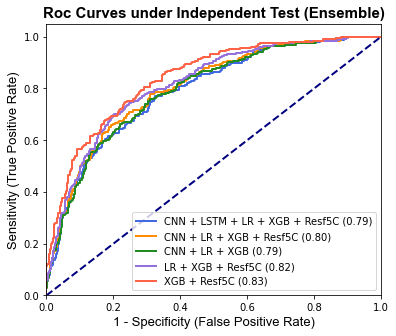

In [16]:
plt.figure(figsize=(6, 5))
lw = 2
plt.plot(
    fpr1,
    tpr1,
    color="royalblue",
    lw=lw,
    label="CNN + LSTM + LR + XGB + Resf5C (0.79)" % roc_auc1,
)
plt.plot(
    fpr2,
    tpr2,
    color="darkorange",
    lw=lw,
    label="CNN + LR + XGB + Resf5C (0.80)" % roc_auc2,
)
plt.plot(
    fpr3,
    tpr3,
    color="forestgreen",
    lw=lw,
    label="CNN + LR + XGB (0.79)" % roc_auc3,
)
plt.plot(
    fpr4,
    tpr4,
    color="mediumpurple",
    lw=lw,
    label="LR + XGB + Resf5C (0.82)" % roc_auc4,
)
plt.plot(
    fpr5,
    tpr5,
    color="tomato",
    lw=lw,
    label="XGB + Resf5C (0.83)" % roc_auc5,
)

font1 = {'family' : 'Arial',
'weight' : 'bold',
'size' : 15,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 13,
}
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1 - Specificity (False Positive Rate)", font2)
plt.ylabel("Sensitivity (True Positive Rate)", font2)
plt.title("Roc Curves under Independent Test (Ensemble)",font1)
plt.legend(loc="lower right")
plt.savefig(file_path+'ensemble.svg', format='svg')